## Productionizing R workload with Amazon SageMaker

This is a notebook that accompanies the R Studio walk through in [reInvent 2020 AIML](https://github.com/aws-samples/reinvent2020-aim404-productionize-r-using-amazon-sagemaker)

Get started by cloning the repo and saving this notebook in the working directory:

```
git clone https://github.com/aws-samples/reinvent2020-aim404-productionize-r-using-amazon-sagemaker.git
cd reinvent2020-aim404-productionize-r-using-amazon-sagemaker
```

In [ ]:
# Install Dependencies
install.packages(c('readr', 'curl', 'ggplot2', 'dplyr', 'stringr', 'fable', 'tsibble', 'dplyr', 'feasts', 'remotes', 'urca', 'sodium', 'plumber', 'jsonlite'))

In [ ]:
library(fable)
library(tsibble)
library(dplyr)

### Load Data

Load the data and plot tourism information

Quarter,Region,State,Purpose,Trips
<qtr>,<chr>,<chr>,<chr>,<dbl>
1998 Q1,Adelaide,South Australia,Business,135.07769
1998 Q2,Adelaide,South Australia,Business,109.98732
1998 Q3,Adelaide,South Australia,Business,166.03469
1998 Q4,Adelaide,South Australia,Business,127.16046
1999 Q1,Adelaide,South Australia,Business,137.44853
1999 Q2,Adelaide,South Australia,Business,199.91259
1999 Q3,Adelaide,South Australia,Business,169.35509
1999 Q4,Adelaide,South Australia,Business,134.35794
2000 Q1,Adelaide,South Australia,Business,154.03440


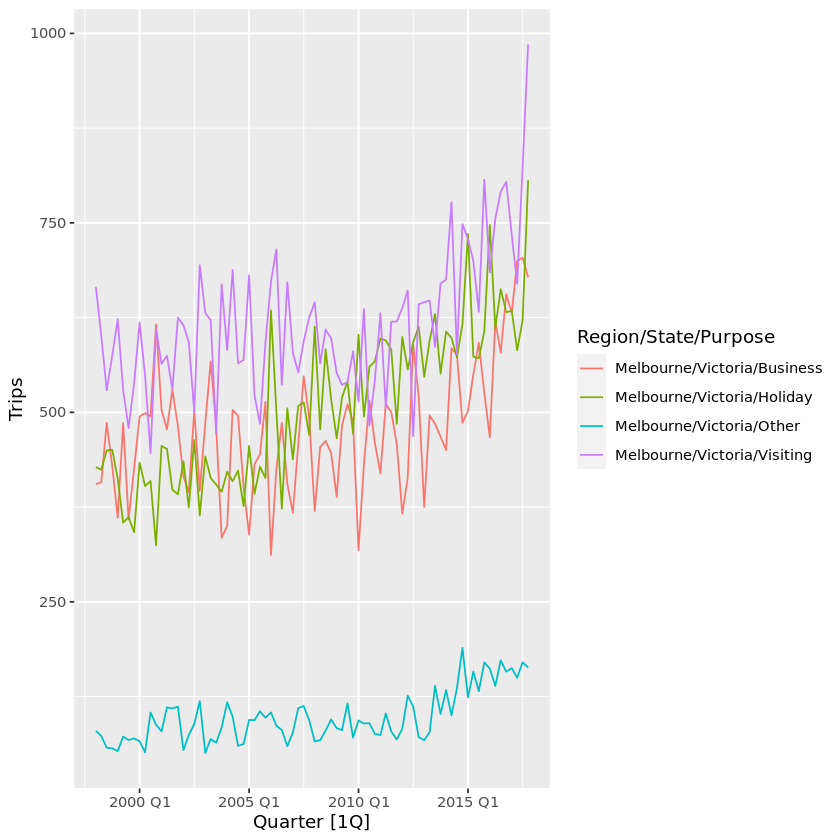

In [4]:
## Setting parameters
city <- 'Melbourne'
ets_trend_method <- 'A' # additive
ic <- 'aic' # use aic as information criteria to select model

## Getting data
tourism_city <- tourism %>%
  filter(Region == city)
tourism

## Exploration
# Purpose: Business, Holiday, Visiting friends and family, or Others
tourism_city %>%
  autoplot(Trips)

### Train the local model

In [5]:
## Training ETS and ARIMA models
fitted_model <- tourism_city %>%
  model(
    ets = ETS(Trips ~ trend(ets_trend_method), ic = ic),
    arima = ARIMA(Trips, ic = ic)
  )
fitted_model

## Inferencing
fc <- fitted_model %>%
  forecast(h = "5 years")
fc

Region,State,Purpose,ets,arima
<chr>,<chr>,<chr>,<model>,<model>
Melbourne,Victoria,Business,"<ETS(A,A,A)>","<ARIMA(0,1,2)(1,0,1)[4] w/ drift>"
Melbourne,Victoria,Holiday,"<ETS(M,A,A)>","<ARIMA(0,1,1) w/ drift>"
Melbourne,Victoria,Other,"<ETS(A,A,N)>","<ARIMA(0,1,1) w/ drift>"
Melbourne,Victoria,Visiting,"<ETS(M,A,A)>","<ARIMA(0,1,1)(1,0,2)[4]>"


Region,State,Purpose,.model,Quarter,Trips,.mean
<chr>,<chr>,<chr>,<chr>,<qtr>,<dist>,<dbl>
Melbourne,Victoria,Business,ets,2018 Q1,"N(619, 3533)",618.5614
Melbourne,Victoria,Business,ets,2018 Q2,"N(709, 3766)",709.0934
Melbourne,Victoria,Business,ets,2018 Q3,"N(738, 4042)",738.4658
Melbourne,Victoria,Business,ets,2018 Q4,"N(713, 4364)",713.4445
Melbourne,Victoria,Business,ets,2019 Q1,"N(664, 4735)",664.0338
Melbourne,Victoria,Business,ets,2019 Q2,"N(755, 5159)",754.5658
Melbourne,Victoria,Business,ets,2019 Q3,"N(784, 5640)",783.9382
Melbourne,Victoria,Business,ets,2019 Q4,"N(759, 6181)",758.9169
Melbourne,Victoria,Business,ets,2020 Q1,"N(710, 6786)",709.5062


### Evaluate the local model

Region,State,Purpose,.model,Quarter,Trips,.mean,80%,95%
<chr>,<chr>,<chr>,<chr>,<qtr>,<dist>,<dbl>,<hilo>,<hilo>
Melbourne,Victoria,Business,ets,2018 Q1,"N(619, 3533)",618.5614,"[542.3864, 694.7363]80","[502.0619, 735.0609]95"
Melbourne,Victoria,Business,ets,2018 Q2,"N(709, 3766)",709.0934,"[630.4443, 787.7426]80","[588.8099, 829.3769]95"
Melbourne,Victoria,Business,ets,2018 Q3,"N(738, 4042)",738.4658,"[656.9891, 819.9425]80","[613.8580, 863.0737]95"
Melbourne,Victoria,Business,ets,2018 Q4,"N(713, 4364)",713.4445,"[628.7879, 798.1010]80","[583.9734, 842.9155]95"
Melbourne,Victoria,Business,ets,2019 Q1,"N(664, 4735)",664.0338,"[575.8480, 752.2196]80","[529.1653, 798.9024]95"
Melbourne,Victoria,Business,ets,2019 Q2,"N(755, 5159)",754.5658,"[662.5141, 846.6176]80","[613.7848, 895.3469]95"
Melbourne,Victoria,Business,ets,2019 Q3,"N(784, 5640)",783.9382,"[687.6922, 880.1843]80","[636.7426, 931.1339]95"
Melbourne,Victoria,Business,ets,2019 Q4,"N(759, 6181)",758.9169,"[658.1603, 859.6735]80","[604.8230, 913.0108]95"
Melbourne,Victoria,Business,ets,2020 Q1,"N(710, 6786)",709.5062,"[603.9336, 815.0789]80","[548.0468, 870.9657]95"


# A tibble: 8 × 13
  Region  State Purpose .model .type     ME  RMSE   MAE    MPE  MAPE  MASE RMSSE
  <chr>   <chr> <chr>   <chr>  <chr>  <dbl> <dbl> <dbl>  <dbl> <dbl> <dbl> <dbl>
1 Melbou… Vict… Holiday ets    Trai…  4.67   50.5  37.2  0.217  7.29 0.675 0.697
2 Melbou… Vict… Busine… ets    Trai…  3.31   56.4  42.9 -0.753  9.31 0.691 0.740
3 Melbou… Vict… Busine… arima  Trai…  2.54   58.2  46.0 -1.17  10.1  0.741 0.765
4 Melbou… Vict… Holiday arima  Trai… -4.64   54.3  41.4 -2.44   8.46 0.752 0.751
5 Melbou… Vict… Other   arima  Trai… -0.344  21.7  17.0 -6.16  19.5  0.763 0.772
6 Melbou… Vict… Other   ets    Trai… -0.142  21.7  17.0 -5.97  19.6  0.767 0.773
7 Melbou… Vict… Visiti… ets    Trai…  8.17   60.9  51.4  0.433  8.28 0.819 0.782
8 Melbou… Vict… Visiti… arima  Trai…  6.89   63.1  51.7  0.106  8.44 0.825 0.809
# … with 1 more variable: ACF1 <dbl>


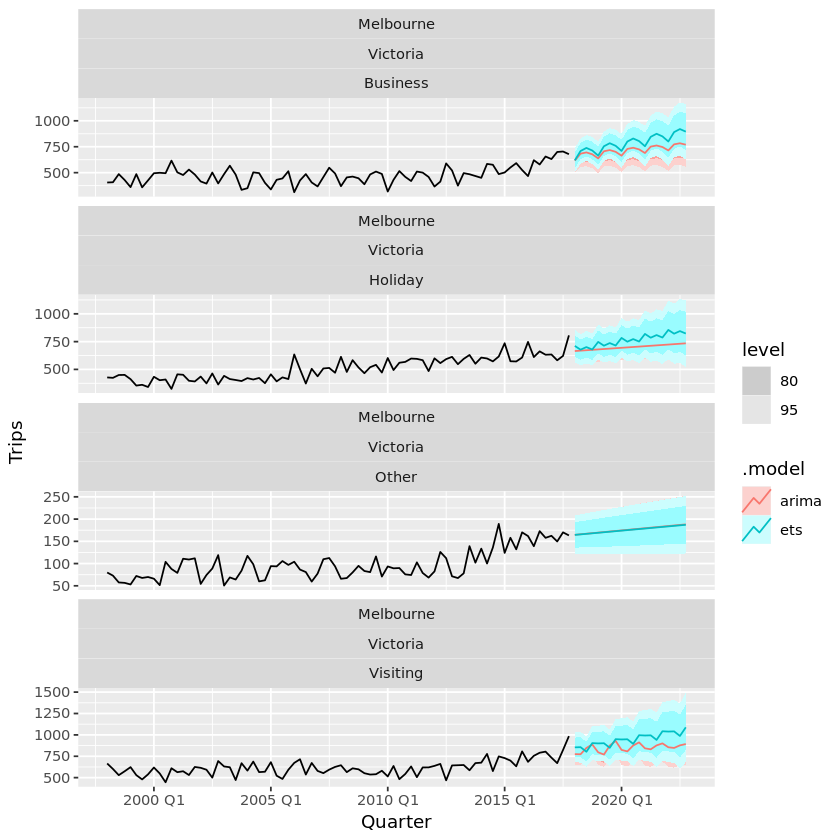

In [6]:
fc %>%
  hilo(level = c(80, 95))

fc %>%
  autoplot(tourism_city)

## Analysis
accuracy_report <- fitted_model %>%
  accuracy() %>%
  arrange(MASE)
print(accuracy_report)

### Build container

In [7]:
## Getting libraries
library(reticulate)
use_python('/usr/bin/python') # instruct reticulate to use the system python
sagemaker <- import('sagemaker')
boto3 <- import('boto3')
library(tsibble)

Warning message:
“Python '/usr/bin/python' was requested but '/home/ec2-user/anaconda3/envs/R/bin/python3' was loaded instead (see reticulate::py_config() for more information)”


Build and push the container to ECR (Make sure your role has permissions for this) - alternatively you can run the following from your terminal to see the progress of the docker build.

```
./build_and_push_docker.sh r-fable-trip-forecasting latest
```

In [8]:
# Amazon SageMaker runs your code in a container image with the dependencies.
# We build a R container using the shell script that reads the Dockerfile
container <- 'r-fable-trip-forecasting'
tag <- 'latest'
system(sprintf('./build_and_push_docker.sh %s %s', container, tag))

### Train in SageMaker

Now let's upload the toursim data as an RDS file

In [11]:
# define cloud resources
session <- sagemaker$Session()
region <- session$boto_region_name
bucket<-session$default_bucket()
role <- sagemaker$get_execution_role()
account <- boto3$client('sts')$get_caller_identity()$Account

# define training input and output parameters
image <- sprintf('%s.dkr.ecr.%s.amazonaws.com/%s:%s', account, region, container, tag)
output_path <- sprintf('s3://%s/%s', bucket, container)
hyperparameters = list('city'='Melbourne', 'ets_trend_method' = 'A', 'ic' = 'aic')

# create a RDS file and upload to S3
rds_file = 'tourism_tsbl.rds'
saveRDS(tourism, file=rds_file)
s3_client <- boto3$client('s3')
s3_client$upload_file(rds_file, bucket, rds_file)
training_input <- sagemaker$TrainingInput(s3_data = sprintf('s3://%s/%s', bucket, rds_file))

Create the estimator and and train the model

In [12]:
## Initiate SageMaker Estimator
estimator <- sagemaker$estimator$Estimator(role = role,
                                           image_uri = image,
                                           instance_type = 'ml.m4.xlarge',
                                           instance_count = 1L,
                                           volume_size_in_gb = 5L,
                                           max_run = 3600L,
                                           input_mode = 'File',
                                           base_job_name = 'r-fable-trip-forecasting',
                                           output_path = output_path,
                                           sagemaker_session = session, 
                                           hyperparameters = hyperparameters)

estimator$fit(inputs = list('train' = training_input), 
              wait = TRUE) # wait = FALSE would submit an async job

### Evaluate with SageMaker

Evaluate the model using a SageMaker processing job

In [13]:
## Evaluate the model with Amazon SageMaker Processing, reusing the same container image
processor <- sagemaker$processing$ScriptProcessor(role = role,
                                                  image_uri = image,
                                                  command = list('/usr/bin/Rscript'),
                                                  instance_type = 'ml.t3.large',
                                                  instance_count = 1L,
                                                  volume_size_in_gb = 5L,
                                                  max_runtime_in_seconds = 3600L,
                                                  base_job_name = 'r-fable-evaluation',
                                                  sagemaker_session = session)

# define input/output
output_processing_path <- sprintf('%s/%s/%s', output_path, 'evaluation', 'output') # on S3
processing_input <- list(sagemaker$processing$ProcessingInput(input_name = 'model-for-evaluate', 
                                                              source = estimator$model_data, 
                                                              destination = '/opt/ml/processing/input'))
processing_output <- list(sagemaker$processing$ProcessingOutput(output_name = 'evaluation-output', 
                                                                source='/opt/ml/processing/output', 
                                                                destination = output_processing_path))
result=processor$run(code = 'fable_sagemaker.r',
                     inputs = processing_input,
                     outputs = processing_output,
                     arguments = list('evaluate', hyperparameters$city),
                     wait = FALSE)

### Deploy Endpoint

TODO Extend the container to support [serving with plumber](https://github.com/aws/amazon-sagemaker-examples/blob/master/r_examples/r_serving_with_plumber/Plumber%20Example.ipynb)

In [ ]:
model_endpoint <- estimator$deploy(initial_instance_count = 1L,
                                   instance_type = 'ml.m4.xlarge')